(0, 40)

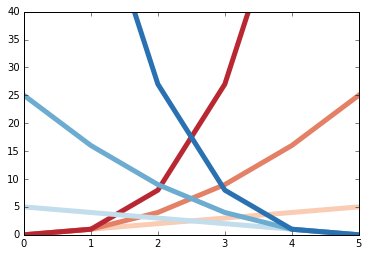

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

almost_black = '#262626'
my_red3 = '#b92732'
my_red2 = '#e48065'
my_red1 = '#faccb4'

my_blue3 = '#2971b1'
my_blue2 = '#6bacd0'
my_blue1 = '#c2ddeb'

my_green3 = '#0c7068'
my_green2 = '#58b0a6'
my_green1 = '#b3e2db'

my_yellow3 = '#995d12'
my_yellow2 = '#cfa255'
my_yellow1 = '#f0dfb2'

my_gray3 = '#4d4d4d'
my_gray2 = '#808080'
my_gray1 = '#cccccc'

my_light_gray = '#f4f4f4'

x = np.array([0,1,2,3,4,5])
y3 = x**3
y2 = x**2
y1 = x**1

plt.plot(x,y1,color=my_red1, lw=5)
plt.plot(x,y2,color=my_red2, lw=5)
plt.plot(x,y3,color=my_red3, lw=5)

plt.plot(x[::-1],y1,color=my_blue1, lw=5)
plt.plot(x[::-1],y2,color=my_blue2, lw=5)
plt.plot(x[::-1],y3,color=my_blue3, lw=5)

plt.ylim([0, 40])

In [17]:
x[::-1]

array([5, 4, 3, 2, 1, 0])

https://color.hailpixel.com/
http://www.paletton.com/#uid=13i0u0kllllaFw0g0qFqFg0w0aF
http://colorbrewer2.org/

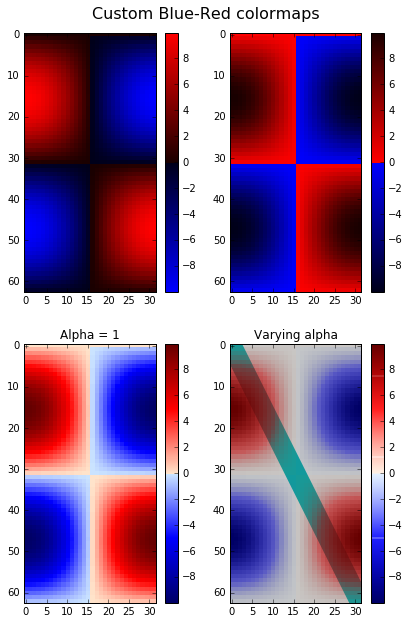

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap

"""

Example: suppose you want red to increase from 0 to 1 over the bottom
half, green to do the same over the middle half, and blue over the top
half.  Then you would use:

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0))}

If, as in this example, there are no discontinuities in the r, g, and b
components, then it is quite simple: the second and third element of
each tuple, above, is the same--call it "y".  The first element ("x")
defines interpolation intervals over the full range of 0 to 1, and it
must span that whole range.  In other words, the values of x divide the
0-to-1 range into a set of segments, and y gives the end-point color
values for each segment.

Now consider the green. cdict['green'] is saying that for
0 <= x <= 0.25, y is zero; no green.
0.25 < x <= 0.75, y varies linearly from 0 to 1.
x > 0.75, y remains at 1, full green.

If there are discontinuities, then it is a little more complicated.
Label the 3 elements in each row in the cdict entry for a given color as
(x, y0, y1).  Then for values of x between x[i] and x[i+1] the color
value is interpolated between y1[i] and y0[i+1].

Going back to the cookbook example, look at cdict['red']; because y0 !=
y1, it is saying that for x from 0 to 0.5, red increases from 0 to 1,
but then it jumps down, so that for x from 0.5 to 1, red increases from
0.7 to 1.  Green ramps from 0 to 1 as x goes from 0 to 0.5, then jumps
back to 0, and ramps back to 1 as x goes from 0.5 to 1.

row i:   x  y0  y1
                /
               /
row i+1: x  y0  y1

Above is an attempt to show that for x in the range x[i] to x[i+1], the
interpolation is between y1[i] and y0[i+1].  So, y0[0] and y1[-1] are
never used.

"""


cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 1.0),
                   (1.0, 0.1, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.1),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict3 = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = cdict3.copy()
cdict4['alpha'] = ((0.0, 1.0, 1.0),
                #   (0.25,1.0, 1.0),
                   (0.5, 0.3, 0.3),
                #   (0.75,1.0, 1.0),
                   (1.0, 1.0, 1.0))


# Now we will use this example to illustrate 3 ways of
# handling custom colormaps.
# First, the most direct and explicit:

blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

# Second, create the map explicitly and register it.
# Like the first method, this method works with any kind
# of Colormap, not just
# a LinearSegmentedColormap:

blue_red2 = LinearSegmentedColormap('BlueRed2', cdict2)
plt.register_cmap(cmap=blue_red2)

# Third, for LinearSegmentedColormap only,
# leave everything to register_cmap:

plt.register_cmap(name='BlueRed3', data=cdict3)  # optional lut kwarg
plt.register_cmap(name='BlueRedAlpha', data=cdict4)

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

# Make the figure:

plt.figure(figsize=(6, 9))
plt.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Make 4 subplots:

plt.subplot(2, 2, 1)
plt.imshow(Z, interpolation='nearest', cmap=blue_red1)
plt.colorbar()

plt.subplot(2, 2, 2)
cmap = plt.get_cmap('BlueRed2')
plt.imshow(Z, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this;
# it is done here just to illustrate the method.

plt.rcParams['image.cmap'] = 'BlueRed3'

plt.subplot(2, 2, 3)
plt.imshow(Z, interpolation='nearest')
plt.colorbar()
plt.title("Alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
#

plt.subplot(2, 2, 4)
# Draw a line with low zorder so it will be behind the image.
plt.plot([0, 10*np.pi], [0, 20*np.pi], color='c', lw=20, zorder=-1)

plt.imshow(Z, interpolation='nearest')
plt.colorbar()

# Here it is: changing the colormap for the current image and its
# colorbar after they have been plotted.
plt.set_cmap('BlueRedAlpha')
plt.title("Varying alpha")
#

plt.suptitle('Custom Blue-Red colormaps', fontsize=16)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

"""

Example: suppose you want red to increase from 0 to 1 over the bottom
half, green to do the same over the middle half, and blue over the top
half.  Then you would use:

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0))}

If, as in this example, there are no discontinuities in the r, g, and b
components, then it is quite simple: the second and third element of
each tuple, above, is the same--call it "y".  The first element ("x")
defines interpolation intervals over the full range of 0 to 1, and it
must span that whole range.  In other words, the values of x divide the
0-to-1 range into a set of segments, and y gives the end-point color
values for each segment.

Now consider the green. cdict['green'] is saying that for
0 <= x <= 0.25, y is zero; no green.
0.25 < x <= 0.75, y varies linearly from 0 to 1.
x > 0.75, y remains at 1, full green.

If there are discontinuities, then it is a little more complicated.
Label the 3 elements in each row in the cdict entry for a given color as
(x, y0, y1).  Then for values of x between x[i] and x[i+1] the color
value is interpolated between y1[i] and y0[i+1].

Going back to the cookbook example, look at cdict['red']; because y0 !=
y1, it is saying that for x from 0 to 0.5, red increases from 0 to 1,
but then it jumps down, so that for x from 0.5 to 1, red increases from
0.7 to 1.  Green ramps from 0 to 1 as x goes from 0 to 0.5, then jumps
back to 0, and ramps back to 1 as x goes from 0.5 to 1.

row i:   x  y0  y1
                /
               /
row i+1: x  y0  y1

Above is an attempt to show that for x in the range x[i] to x[i+1], the
interpolation is between y1[i] and y0[i+1].  So, y0[0] and y1[-1] are
never used.

"""


cdict1 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 0.1),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 1.0),
                   (0.5, 0.1, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5, 0.0, 1.0),
                   (1.0, 0.1, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.1),
                   (0.5, 1.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

cdict3 = {'red':  ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.8, 1.0),
                   (0.75, 1.0, 1.0),
                   (1.0, 0.4, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5, 0.9, 0.9),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.4),
                   (0.25, 1.0, 1.0),
                   (0.5, 1.0, 0.8),
                   (0.75, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }

# Make a modified version of cdict3 with some transparency
# in the middle of the range.
cdict4 = cdict3.copy()
cdict4['alpha'] = ((0.0, 1.0, 1.0),
                #   (0.25,1.0, 1.0),
                   (0.5, 0.3, 0.3),
                #   (0.75,1.0, 1.0),
                   (1.0, 1.0, 1.0))


# Now we will use this example to illustrate 3 ways of
# handling custom colormaps.
# First, the most direct and explicit:

blue_red1 = LinearSegmentedColormap('BlueRed1', cdict1)

# Second, create the map explicitly and register it.
# Like the first method, this method works with any kind
# of Colormap, not just
# a LinearSegmentedColormap:

blue_red2 = LinearSegmentedColormap('BlueRed2', cdict2)
plt.register_cmap(cmap=blue_red2)

# Third, for LinearSegmentedColormap only,
# leave everything to register_cmap:

plt.register_cmap(name='BlueRed3', data=cdict3)  # optional lut kwarg
plt.register_cmap(name='BlueRedAlpha', data=cdict4)

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2*np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

# Make the figure:

plt.figure(figsize=(6, 9))
plt.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

# Make 4 subplots:

plt.subplot(2, 2, 1)
plt.imshow(Z, interpolation='nearest', cmap=blue_red1)
plt.colorbar()

plt.subplot(2, 2, 2)
cmap = plt.get_cmap('BlueRed2')
plt.imshow(Z, interpolation='nearest', cmap=cmap)
plt.colorbar()

# Now we will set the third cmap as the default.  One would
# not normally do this in the middle of a script like this;
# it is done here just to illustrate the method.

plt.rcParams['image.cmap'] = 'BlueRed3'

plt.subplot(2, 2, 3)
plt.imshow(Z, interpolation='nearest')
plt.colorbar()
plt.title("Alpha = 1")

# Or as yet another variation, we can replace the rcParams
# specification *before* the imshow with the following *after*
# imshow.
# This sets the new default *and* sets the colormap of the last
# image-like item plotted via pyplot, if any.
#

plt.subplot(2, 2, 4)
# Draw a line with low zorder so it will be behind the image.
plt.plot([0, 10*np.pi], [0, 20*np.pi], color='c', lw=20, zorder=-1)

plt.imshow(Z, interpolation='nearest')
plt.colorbar()

# Here it is: changing the colormap for the current image and its
# colorbar after they have been plotted.
plt.set_cmap('BlueRedAlpha')
plt.title("Varying alpha")
#

plt.suptitle('Custom Blue-Red colormaps', fontsize=16)

plt.show()